In [3]:
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv("C:/Users/embarcados/Desktop/ml-data/data/titanic-data.csv")

In [7]:
data.shape

(891, 12)

In [9]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [10]:
from sklearn.cross_validation import train_test_split

train, test = train_test_split(data, test_size=0.2)

In [11]:
train.shape

(712, 12)

In [13]:
number_passengers = train.shape[0]

survived_passengers_ids = (train['Survived'] == 1)
survived_passengers_ids.head()

625    False
124    False
381     True
522    False
245    False
Name: Survived, dtype: bool

In [16]:
number_survived_passengers = np.sum(survived_passengers_ids)
number_survived_passengers

276

In [23]:
survived_rate = 100 * number_survived_passengers / float(number_passengers)
survived_rate

38.764044943820224

In [28]:
women_only_ids = (train['Sex'] == 'female')
men_only_ids = (train['Sex'] == 'male')

women_onboard = train[women_only_ids]
men_onboard = train[men_only_ids]

women_onboard.shape
men_onboard.shape

(464, 12)

In [35]:
women_survived_ids = (women_onboard['Survived'] == 1)
men_survived_ids = (men_onboard['Survived'] == 1)

100 * np.sum(women_survived_ids) / float(np.sum(women_only_ids))
100 * np.sum(men_survived_ids) / float(np.sum(men_only_ids))

19.612068965517242

In [37]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,572.000000,712.000000,712.000000,712.000000
mean,442.092697,0.387640,2.293539,29.413759,0.529494,0.370787,32.193568
std,256.500636,0.487554,0.836618,14.860969,1.099406,0.748287,48.332901
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,220.750000,0.000000,2.000000,20.000000,0.000000,0.000000,7.925000
50%,442.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.500000
75%,658.250000,1.000000,3.000000,38.000000,1.000000,0.000000,31.275000
max,891.000000,1.000000,3.000000,80.000000,8.000000,5.000000,512.329200


In [38]:
import matplotlib.pyplot as plt

In [41]:
train['Age'].hist()
plt.show()

In [43]:
train['Age'].hist(bins = 24)
plt.show()

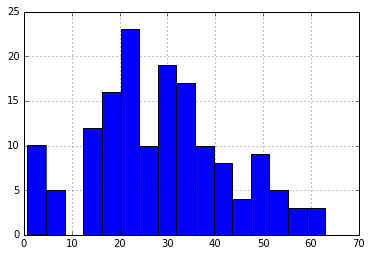

In [48]:
%matplotlib inline
women_onboard[women_survived_ids]['Age'].hist(bins=16)
plt.show()

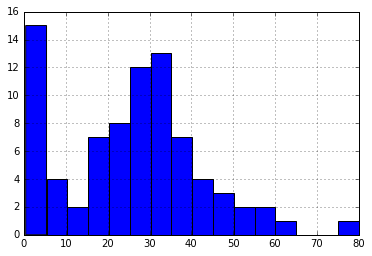

In [50]:
men_onboard[men_survived_ids]['Age'].hist(bins = 16)

In [51]:
train['Gender'] = 4

C:\Users\embarcados\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [54]:
train['Gender'] = train['Sex'].map( {'female': 0, 'male': 1}).astype(np.int)

C:\Users\embarcados\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [55]:
train['Gender'].unique()

array([1, 0], dtype=int64)

In [57]:
train['Age'].head(20)

625    61.0
124    54.0
381     1.0
522     NaN
245    44.0
178    30.0
667     NaN
187    45.0
814    30.5
802    11.0
170    61.0
611     NaN
516    34.0
584     NaN
563     NaN
242    29.0
171     4.0
19      NaN
491    21.0
222    51.0
Name: Age, dtype: float64

In [59]:
train['Age'].median()

28.0

In [61]:
median_ages = np.zeros((2,3))

In [63]:
median_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [65]:
train[(train['Gender'] == 0) & (train['Pclass'] == 1)]['Age'].dropna().median()

33.0

In [67]:
for sex in range(2):
    for pclass in range(3):
        mask = (train['Gender'] == sex) & (train['Pclass'] == pclass + 1)
        median_ages[sex][pclass] = train[mask]['Age'].dropna().median()

In [69]:
median_ages

array([[ 33. ,  28.5,  19. ],
       [ 40. ,  30. ,  25. ]])

In [ ]:
train['AgeFill'] = 0

for sex in range(2):
    for pclass in range(3):
        mask = (train['Gender'] == sex) & (train['Pclass'] == pclass + 1) & 